***Support Vector Machines***
    Using SVM with Python to predict whether a breast cancer tumor is malignant or benign. Exercise uses numpy, pandas, and scikitlearn and utilizes train test split, SVM, SVC,  and GridSearch to identify the best parameters for prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('setup complete')

setup complete


In [4]:
# 1 point

# import and load the breast cancer dataset 
from sklearn.datasets import load_breast_cancer

# output a variable where the data is loaded straight from sklearn

cancer = 0

cancer = load_breast_cancer()


In [5]:
assert cancer.data.shape == (569,30)

In [7]:
print(cancer['DESCR'])

In [8]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# 1 point

#load the data from the dataset into a pd df

#output a dataframe with the data of the dataset and the column names as feature names
#IT SHOULD NOT INCLUDE THE TARGET 

df_feat = 0

df_feat = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
b = True
for i in cancer['feature_names']:
    if df_feat[i].shape != (569,):
        b = False
        break
assert b

In [18]:
# 1 point

# create a dataframe with all the targets and the column name your be 'Cancer'
# output a single column dataframe
df_target = 0
# YOUR CODE HERE

df_target = pd.DataFrame(cancer.target, columns = ['Cancer'])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [19]:
assert df_target['Cancer'].shape == (569,)

In [70]:
#1 point
# get the train test split, tested with random state 0 and test_size 0.2
# import if needed
# all the subsets should be numpy arrays
# TIP carefull with the shape of the Y
# YOUR CODE HERE

from sklearn.model_selection import train_test_split, cross_validate

x_train, x_test, y_train, y_test = train_test_split( df_feat.values, df_target.values, test_size = 0.2, random_state = 0)

y_train, y_test = y_train.flatten(), y_test.flatten()

In [71]:
assert x_train.shape == (455,30)
assert x_test.shape == (114,30)
assert y_train.shape == (455,)
assert y_test.shape == (114,)

In [132]:
# 2 points
#Train the support vector classifier
# import if needed

clf = 0

from sklearn.svm import SVC

clf = SVC()
clf.fit(x_train, y_train)

clf.support_vectors_.shape

(123, 30)

In [73]:
assert clf.support_vectors_.shape == (123,30)

In [84]:
# 3 points
# predict the testing data and get the accuracy
# import if needed
# output preds is the array with the predictions and acc is a float between 0 and 1
preds = 0
acc = 0
# YOUR CODE HERE
from sklearn.metrics import accuracy_score

preds = clf.predict(x_test)
acc = accuracy_score(y_test, preds)
print(acc)

0.9298245614035088


In [85]:
assert acc > 0.85
assert preds.shape == (114,)

***Everything is being classified into a single class! Use Grid Search to search for the best parameters! (Scikitlearn GridSearchCV)***


In [89]:
# 2 points
#Set parameters
# the parameters should be in a dict format
params = {}
params = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
svm = SVC()
clf = GridSearchCV(svm, params)
clf.fit(x_train, y_train)

preds = clf.predict(x_test)
acc = accuracy_score(y_test, preds)
print(acc)

0.956140350877193


In [88]:
assert len(params) == 2
assert len(params['kernel']) == 2

In [94]:
#Fit grid (Note to self: first it runs the same loop with cross-validation to find the best parameter 
#combination. Once it has the best combination, it runs fit again on all data passed to fit 
#(without cross-validation), to built a single new model using the best parameter setting.)

# 4 points
# add an svm to the grid and train it
# the SVM should be an untrained one
# import if needed 
from sklearn import svm

svc = 0
grid_clf = 0

# YOUR CODE HERE
params = {}
params = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

svc = svm.SVC()
grid_clf = GridSearchCV(svc, params)
grid_clf.fit(x_train, y_train)

preds = grid_clf.predict(x_test)
acc = accuracy_score(y_test, preds)
print(acc)


0.956140350877193


In [95]:
dic = grid_clf.get_params(deep=False)
assert type(dic['estimator']) == type(svm.SVC()) 
assert dic['pre_dispatch'] == '2*n_jobs'

In [112]:
# 2 point
#Get in a list the best parameters of the grid
#output python list with the best parameters sorted
best_params = []
# YOUR CODE HERE

best_params = sorted(clf.cv_results_.keys())


In [113]:
assert best_params[0] == 'mean_fit_time'
assert best_params[1] == 'mean_score_time'
assert best_params[2] == 'mean_test_score'
assert best_params[3] == 'param_C'

In [114]:
# 5 points
# predict the testing set and get the accuracy
# accuracy as always will be between 0 and 1
preds = 0
acc = 0
# YOUR CODE HERE
preds = grid_clf.predict(x_test)
acc = accuracy_score(y_test, preds)
print(acc)

0.956140350877193


In [115]:

assert acc > 0.92
assert preds[preds.argmax()] == 1
assert preds.shape == (114,)

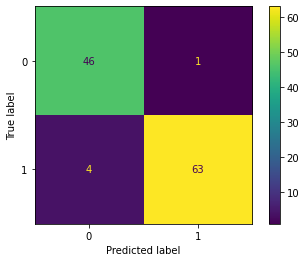

In [133]:
# 3 points
# get the confusion matrix
#import if needed
conf_mat = []

# YOUR CODE HERE

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(preds, y_test)
#conf_mat = np.transpose(conf_mat)

plot_confusion_matrix(grid_clf, x_test, y_test)  
plt.show()

In [134]:
assert conf_mat.shape == (2,2)
assert conf_mat[0][1] < 7
assert conf_mat[1][0] < 3


# Discussion of results

In [ ]:
# The model diagnosed 1 person with no cancer has cancer and
# 4 people has cancer when they have no cancer